### Predicting Airbnb Listing Prices in Melbourne__ {-}

---

## Part 1: Problem Description and Initial Data Analysis {-}

Number of Numerical Variables 34
Number of Categorical Variables 27
Numerical Variables: ['ID', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Categorical Variables: ['source', 'name', 'description', 'neighborhood_overview', 'host_name', 'ho

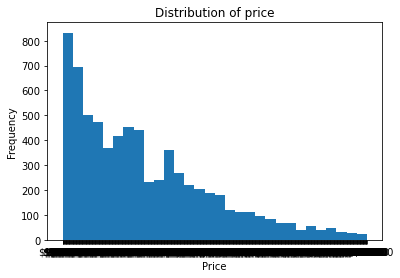

Number of Columns with Missing Values: 23
Columns with Missing Values: ['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
Missing Values per Column: ID                                                 0
source                                             0
name                                               1
description                                       57
neighborhood_overview                           1823
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_hos

In [1]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("train.csv")

import matplotlib.pyplot as plt
import seaborn as sns

#Types of Variables
count_numerical = df_train.select_dtypes(include=['int64', 'float64']).shape[1]
print("Number of Numerical Variables", count_numerical)
count_categorical = df_train.select_dtypes(include=['object']).shape[1]
print("Number of Categorical Variables", count_categorical)

numerical = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Variables:", numerical)
categorical = df_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical)


#Explonatory Analysis
print(df_train.describe())
print(df_train.select_dtypes(include='object').nunique())

price = df_train['price']
plt.hist(price, bins = 30)
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#Missing Values  
columns_with_missing_values = df_train.isna().any()
num_columns_with_missing_values = columns_with_missing_values.sum()
print("Number of Columns with Missing Values:", num_columns_with_missing_values)
columns_with_missing_values = df_train.columns[df_train.isna().any()].tolist()
print("Columns with Missing Values:", columns_with_missing_values)

missing_values_per_column = df_train.isna().sum()
print("Missing Values per Column:", missing_values_per_column)
total_missing_values = missing_values_per_column.sum()
print("Total Missing Values:", total_missing_values)

`(Task 1, Text Here)`
### Forecasting Problem:
 This report and analysis aim to forecast the listing price of Airbnb properties in Melbourne based on the data of different Airbnb’s features. High accuracy forecasting is essential for making business decisions, as it affects the stakeholders directly. In this case, the three main stakeholders of the Airbnb properties are the hosts, the customers and the Airbnb company itself.

### Evaluation Criteria:

 To evaluate the accuracy of our forecasting model, the MSE (Mean Squared Error) method is being used. This method aims to measure the error of the predicting model that built to forecast the price of the Airbnb in Melbourne. Using the MSE, it takes into account the squared average of the difference between the forecasting values and the actual values. If the MSE score is low and close to zero, this means that the difference between real value and predicting value is small. Therefore, when there is no error, the MSE equals to zero. However, the higher the MSE score is, the more error that will occur in our model. Hence, the aim is to get the lowest MSE possible for the forecasting model. 


### Types of Variables:
- The dataset provided has the IDs of 7000 customers with 71 different features or variables for each. There are 34 numerical variables and 27 categorical variables. 

- The 34 numerical variables including 'ID', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'.

- The 27 categorical variables are 'source', 'name', 'description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'amenities', 'has_availability', 'first_review', 'last_review', 'instant_bookable', 'price'.


### Data Summary and Main Data characteristics:

- The data has 7000 observations as response to 7000 customers. There are 71 different variables in total, however, as the customer IDs are unique values, hence there should be 70 variables taken into consideration when doing the analysis and forecasting which will have impact on the forecasting price. The numerical and categorical variables have been identified above. 

- There are also the data summary for each of the variables, which include the count, mean value, standard deviation, min value, max value and the 25% - 50% - 75% value. 


### Missing Values:

- Among 71 variables, there are 23 columns which have missing or null values, including 'name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'. 

- In total, there are 11828 variables which are missing or being input as “null” in the dataset. At the next step, we will fill out these missing values in order to make the analysis and prediction more smoothly and accurate. 


---

## Part 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

In [2]:
#Read test data from a CSV file named 'test.csv' and stores under df_test.
df_test= pd.read_csv('test.csv')

In [3]:
#Setting Pandas Display Options: 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

The codes are setting display options for pandas DataFrames to control how the data is displayed in the Jupyter Notebook:
- All columns will be shown.
- The DataFrame can use the full width available.
- All rows will be shown.
These options are useful for exploring these large datasets of our project. 

In [4]:
#Combine df_train and df_test to perform data cleaning for both datasets
combined_data = pd.concat([df_train, df_test])
combined_data.head()

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,100%,98%,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00
1,1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,100%,98%,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00
2,2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,100%,78%,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00
3,3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,75%,92%,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00"
4,4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,100%,87%,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,"[""Laundromat nearby"", ""Private patio or balcon...",1,14,1.0,1,14,14.0,1.0,14.0,t,17,21,51,312.0,214,39,4,2010-11-24,2023-03-03,4

This line concatenates two DataFrames, df_train and df_test,with the same columns and vertically (along the rows). 
The result is stored in a new DataFrame called combined_data.

In [5]:
#Overview of null variables : 
print(combined_data.isnull().sum().to_string())

ID                                                 0
source                                             0
name                                               1
description                                       88
neighborhood_overview                           3247
host_name                                          0
host_since                                         0
host_location                                   2050
host_about                                      3711
host_response_time                               737
host_response_rate                               737
host_acceptance_rate                             721
host_is_superhost                                  2
host_neighbourhood                              5526
host_listings_count                                0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                 

By reviewing the `combined_data` DataFrame, it becomes evident that the following features, which are of object data type, incorporate a mixed of numerical values and text: `host_response_rate`, `host_acceptance_rate`, and `'price'`.

In [6]:
# Transform host_response_rate, host_acceptance_rate, and price into numerical values
combined_data['host_response_rate'] = combined_data['host_response_rate'].astype(str).str.replace('%', '').astype(float)
combined_data['host_acceptance_rate'] = combined_data['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)
combined_data['price'] = combined_data['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Transform binary_columns with the object type into numerical values
# List of columns with binary 't' and 'f' values and convert 't' to 1 and 'f' to 0
binary_columns = ['instant_bookable', 'has_availability', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost']
combined_data[binary_columns] = combined_data[binary_columns].replace({'t': 1, 'f': 0})

# Transform 'first_review','last_review' and 'host_since' into datetime values
combined_data['first_review'] = pd.to_datetime(combined_data['first_review'])
combined_data['last_review'] = pd.to_datetime(combined_data['last_review'])
combined_data['host_since'] = pd.to_datetime(combined_data['host_since'])


/var/folders/3w/v0fr_l556k32qx2gz_y7cfdm0000gn/T/ipykernel_27735/480703397.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_data['price'] = combined_data['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


This code is performing data transformations on the `combined_data`: 

1. **Transforming Numeric Columns with Percentage and Currency Symbols:**
   - It converts the 'host_response_rate', 'host_acceptance_rate', and 'price' columns into numerical values.
   - For 'host_response_rate' and 'host_acceptance_rate', it removes the percentage sign (%) and converts the values to floating-point numbers.
   - For 'price', it removes both the dollar sign ($) and commas from the values and converts them to floating-point numbers.

2. **Transforming Binary Columns with 't' and 'f' Values:**
   - It takes a list of columns ('instant_bookable', 'has_availability', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost') that contain binary values ('t' and 'f').
   - It replaces 't' with 1 and 'f' with 0, effectively converting them to numerical values.

3. **Transforming Date Columns into Datetime Format:**
   - It transforms the 'first_review', 'last_review', and 'host_since' columns into datetime values using `pd.to_datetime()`. This allows for easy date-based analysis.

These transformations are common preprocessing steps in data analysis and machine learning, ensuring that the data is in a suitable format for further analysis.

By reviewing the `combined_data`, the existing features are the types of array and contain multiple items which are `host_verification` and `amenities`. The code below will help chosing which item to create new feature columns

In [7]:
## Task 2, Question 2 Code Here
# Given list of unique host verification
unique_host = combined_data['host_verifications'].str.split(',').explode().str.strip("[]' ").unique()
unique_host_list= ', '.join(unique_host).split(', ')
print("There are unique host verification methods:", unique_host_list)

There are unique host verification methods: ['email', 'phone', 'work_email']


In [8]:
from collections import Counter
# Given list of unique amenities
unique_amenities = combined_data['amenities'].str.split(',').explode().str.replace('[\[\]"]', '', regex=True).str.strip().unique()
unique_amenities_list= ', '.join(unique_amenities).split(', ')
print("The number of unique amenities is ",len(unique_amenities_list))
# Given list of all amenities:
amenities = combined_data['amenities'].str.split(',').explode().str.replace('[\[\]"]', '', regex=True).str.strip()
# Use Counter to count the occurrences of each amenity
amenity_counts = Counter(amenities)
# Get the top 5 most common amenities
top_amenities = amenity_counts.most_common(5)
# Print the top 5 amenities
print("Top 5 most frequent amenities:")
for amenity, count in top_amenities:
    print(f"{amenity}: {count} times")
amenities_list=[]
for amenity, _ in top_amenities:
    amenities_list.append(amenity)   
print(amenities_list)

The number of unique amenities is  2549
Top 5 most frequent amenities:
Smoke alarm: 9548 times
Kitchen: 9383 times
Essentials: 9327 times
Hangers: 8702 times
Wifi: 8618 times
['Smoke alarm', 'Kitchen', 'Essentials', 'Hangers', 'Wifi']


This is the break down the code step by step:

1. Extracting and formatting Unique Host Verifications:

   - `unique_host` is created by splitting the 'host_verifications' column of the 'combined_data' DataFrame into a list of verifications, exploding the list into separate rows, and stripping characters like square brackets and single quotes. `unique_host` contains the unique host verification methods.
 
 - `unique_host_list` is created by joining the unique host verification methods into a single string, splitting the string into a list, and storing it in `unique_host_list`.

2. Extracting and formatting Unique Amenities:
   - `unique_amenities` is created by splitting the 'amenities' column of the 'combined_data' DataFrame into a list of amenities, removing square brackets and double quotes from each amenity, and stripping any leading or trailing spaces. `unique_amenities` contains the unique amenities.
   - `unique_amenities_list` is created by joining the unique amenities into a single string, splitting the string into a list, and storing it in `unique_amenities_list`.
   - The code counts the number of unique amenities by calculating the length of `unique_amenities_list`. As we can see the number of unique_amenities_list is 2549, we can not use all of them. Therefore, I will choose top 5 common amenities

3. Getting the Top 5 Most Common Amenities:
   - The 'amenities' column of the 'combined_data' DataFrame is processed to obtain a cleaned list of all amenities. This includes removing square brackets, double quotes, and stripping any leading or trailing spaces.
   - The code uses the `Counter` class from the `collections` module to count the occurrences of each amenity in the cleaned list of all amenities.
   - The code extracts the top 5 most common amenities using the `most_common(5)` method on the `Counter` object. These amenities and their respective counts are stored in `top_amenities`.
    - The code then extracts the amenity element from `top_amenities` and stores them in a new list called `amenities_list`.

In [9]:
# Create binary features for each verification method and each amenity: 
for method in unique_host_list:
    combined_data[f'host_has_{method}'] = combined_data['host_verifications'].str.contains(method).astype(int)
for amenity in amenities_list:
    combined_data[f'has_{amenity}'] = combined_data['amenities'].str.contains(amenity).astype(int)

The above code creates binary features for each verification method and each amenity by checking if they are present in the respective columns and converting the result into binary (0 or 1).

1. Create Binary Features for Host Verification Methods
   - The code iterates through each unique host verification method in `unique_host_list`.
   - For each host verification method, it creates a new binary feature column in the 'combined_data' DataFrame. The column name is constructed with the prefix 'host_has_' followed by the verification method name.
   - It uses the `str.contains()` method to check if the verification method is present in the 'host_verifications' column for each row.
   - The result of `str.contains(method)` is a Boolean Series, and `.astype(int)` is used to convert `True` to 1 and `False` to 0, effectively creating a binary feature.
   
2. Create Binary Features for Amenities:
   - The code iterates through each of the top amenities in the list `amenities_list`.
   - For each top amenity, it creates a new binary feature column in the 'combined_data' DataFrame. The column name is constructed with the prefix 'has_' followed by the amenity name.
   - It uses the `str.contains(amenity)` method to check if the amenity is present in the 'amenities' column for each row.
   - Just like with host verifications, the result is a Boolean Series, and `.astype(int)` is used to convert `True` to 1 and `False` to 0, creating a binary feature.


In [10]:
#drop orginal columns `host_verifications` and `amenities` and drop 
column_name_to_drop = ['amenities','host_verifications']  
# Use the drop method to remove the specified column
combined_data = combined_data.drop(column_name_to_drop, axis=1)

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [11]:
from sklearn.impute import SimpleImputer

numerical_cols_with_null = [col for col in combined_data.select_dtypes(include=['int64', 'float64']).columns if combined_data[col].isnull().any() and col != 'price']
datetime_cols_with_null = [col for col in combined_data.select_dtypes(include=['datetime64']).columns if combined_data[col].isnull().any()]

# Define the imputer
imputer = SimpleImputer(strategy='median')

# Impute missing values in numerical columns
combined_data[numerical_cols_with_null] = imputer.fit_transform(combined_data[numerical_cols_with_null])

# Fill missing values in datetime columns using forward fill (ffill)
combined_data[datetime_cols_with_null] = combined_data[datetime_cols_with_null].fillna(method='ffill')


The above code is a data preprocessing step that focuses on handling missing values in a pandas DataFrame called `combined_data`. I use scikit-learn's `SimpleImputer` for numerical columns and the `fillna` method for datetime columns to fill in or impute missing values.

1. Identify Numerical and Datetime Columns with Missing Values:
   - `numerical_cols_with_null` is a list comprehension that identifies numerical columns with missing values (NaN).
     - It first selects columns from `combined_data` that have data types 'int64' or 'float64' using `combined_data.select_dtypes(include=['int64', 'float64'])`.
     - Then, it filters these columns to include only those with missing values using `.columns if combined_data[col].isnull().any()`.
     - Additionally, it excludes the 'price' column from the list of columns with missing values.

   - `datetime_cols_with_null` is a similar list comprehension for identifying datetime columns with missing values.
     - It selects columns with the `datetime64` data type.
     - It filters these columns to include only those with missing values.

2. Impute Missing Values in Numerical Columns and Fill Missing Values in Datetime Columns
   - `imputer = SimpleImputer(strategy='median')` creates an instance of the `SimpleImputer` class with the imputation strategy set to 'median'. This means that for numerical columns, missing values will be replaced with the median of the non-missing values in each column.
   - `combined_data[numerical_cols_with_null] = imputer.fit_transform(combined_data[numerical_cols_with_null])` imputes the missing values in the identified numerical columns using the median imputation strategy.
     - It selects only the columns identified as numerical columns with missing values.
     - It applies the imputation using `fit_transform`.
   - `combined_data[datetime_cols_with_null] = combined_data[datetime_cols_with_null].fillna(method='ffill')` fills the missing values in identified datetime columns using forward fill ('ffill').
     - It selects only the columns identified as datetime columns with missing values.
     - It applies the forward fill method using `fillna`.

In [12]:
categorical_cols_all = [col for col in combined_data.select_dtypes(include=['object']).columns if col not in ['name', 'description', 'neighborhood_overview', 'host_name', 'host_about']]
## except : name, description,neighborhood_overview,host_name,host_about

# Loop through each categorical column
for col in categorical_cols_all:
    # Find the 5 most frequent values
    top_5_values = combined_data[col].value_counts().index[:5]
    # Replace other values with 'other'
    combined_data[col] = combined_data[col].apply(lambda x: x if x in top_5_values else 'other')


The above code is designed to preprocess categorical columns in `combined_data`. It identifies categorical columns, finds the five most frequent values in each of them, and replaces all other values with 'other'.

1. Identify Categorical Columns:
   - `categorical_cols_all` is created using a list comprehension.
   - It selects columns from `combined_data` with the 'object' data type (typically representing categorical data).
   - It excludes specific columns ('name', 'description', 'neighborhood_overview', 'host_name', 'host_about') using the condition `if col not in ['name', 'description', 'neighborhood_overview', 'host_name', 'host_about']`. This is because these columns are informative columns, it is not useful for analytical features.

2. Find the 5 Most Frequent Values and replace Other Values with 'other':
   - The code then iterates through each of the identified categorical columns in `categorical_cols_all`.
   - For each categorical column, it calculates the five most frequent values using `combined_data[col].value_counts().index[:5]`.
   - `combined_data[col].value_counts()` computes the frequency of each unique value in the column, and `.index[:5]` extracts the top five values based on frequency.
   - For each categorical column, it replaces all values not in the top 5 most frequent values with 'other'.
   - This is done using a lambda function: `combined_data[col].apply(lambda x: x if x in top_5_values else 'other')`.


**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [13]:
#Checking null variable again : 
print(combined_data.isnull().sum().to_string())

ID                                                 0
source                                             0
name                                               1
description                                       88
neighborhood_overview                           3247
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                      3711
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_neighbourhood                                 0
host_listings_count                                0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                      0
neighbourhood_cleansed                        

In [14]:
# Split the data back into training and test sets
df_train_imputed = combined_data.iloc[:len(df_train)]
df_test_imputed = combined_data.iloc[len(df_train):]
#drop price column in df_test_imputed
df_test_imputed = df_test_imputed.drop(columns=['price'])

`(Task 2, Question 5 Text Here)`
The above code splits the `combined_data` DataFrame back into training and test sets and removes the 'price' column from the test set. 

1. Split the Data into Training and Test Sets:
   - `df_train_imputed` is created by taking the first portion of rows from the `combined_data` DataFrame, which corresponds to the training data.
   - `df_test_imputed` is created by taking the remaining portion of rows from `combined_data`, which corresponds to the test data.

2. Drop the 'price' Column in the Test Set:
   - `df_test_imputed = df_test_imputed.drop(columns=['price'])` removes the 'price' column from the test set. This is typically done because the 'price' column is the target variable that you want to predict in a machine learning task, and it should not be present in the test set.


**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

#### The below code performs exploratory data analysis (EDA) to measure the relationship between the numerical and catergorical features with the target variable 'price'.

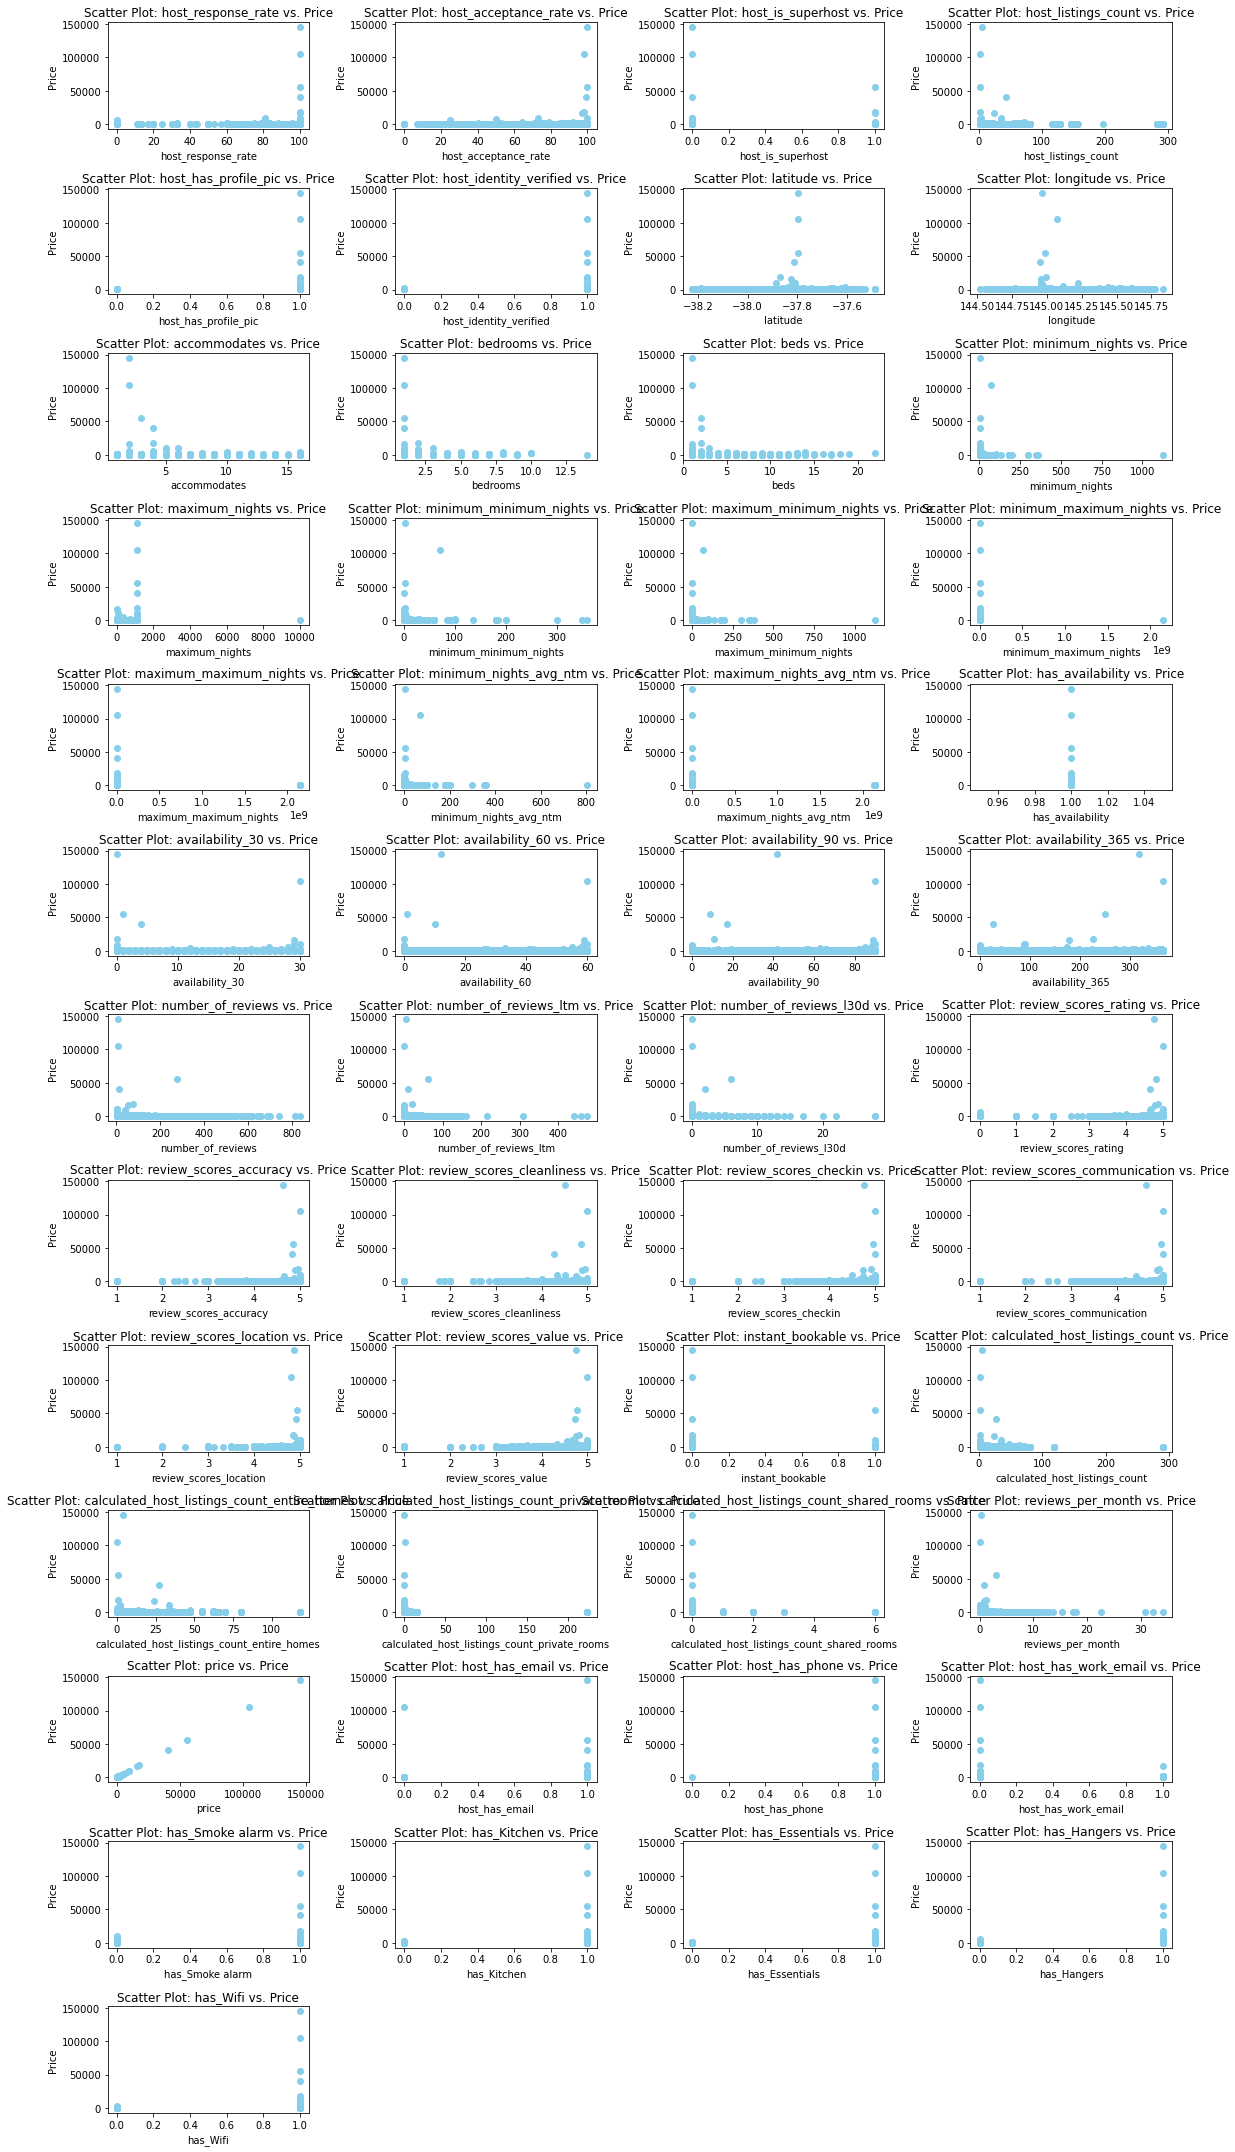

In [15]:
#Box plot of numerical features vs. 'price'
numerical_cols_all = [col for col in df_train_imputed.select_dtypes(include=['int64', 'float64']).columns if col != 'ID']
import matplotlib.pyplot as plt
num_cols = 4
num_rows = len(numerical_cols_all) // num_cols + (len(numerical_cols_all) % num_cols > 0)  # Calculate the number of rows
plt.figure(figsize=(16, 30))  # Adjust the figure size as needed
for i, col in enumerate(numerical_cols_all):
    plt.subplot(num_rows, num_cols, i + 1)  # Position the subplot in the grid
    plt.scatter(df_train_imputed[col], df_train_imputed['price'], color='skyblue')
    plt.title(f'Scatter Plot: {col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Scatter Plots for Numerical Features

The code generates scatter plots for each numerical feature (excluding the 'ID' column) against the 'price' target variable. Each subplot represents a different numerical feature. Scatter plots help visualize the relationship between numerical features and the target variable. They show how the target variable 'price' changes with respect to each feature.
Features with a clear linear relationship with 'price' may indicate a strong impact on price variation. Positive correlations indicate that as the feature increases, the price tends to increase, and vice versa. In this case, it's hard to see any feature has strong correlation with 'price'.

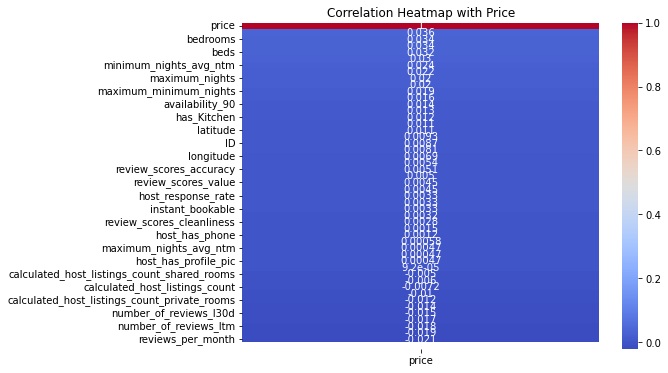


Correlation with 'price':
price                                           1.000000
accommodates                                    0.035625
bedrooms                                        0.034366
minimum_minimum_nights                          0.033550
beds                                            0.031546
availability_365                                0.030334
minimum_nights_avg_ntm                          0.023690
availability_30                                 0.022470
maximum_nights                                  0.019918
minimum_nights                                  0.019612
maximum_minimum_nights                          0.019147
host_acceptance_rate                            0.015603
availability_90                                 0.014214
availability_60                                 0.012944
has_Kitchen                                     0.011840
review_scores_location                          0.010942
latitude                                        0.010508
has_

In [16]:
# Calculate the correlation matrix for numerical features vs. 'price'
import seaborn as sns

correlation_matrix = df_train_imputed.corr()

# Correlation with the target variable 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Create a heatmap for the correlation with 'price'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Price')
plt.show()

# Print the correlation matrix and correlation with 'price'
print("\nCorrelation with 'price':")
print(correlation_with_price)

### Correlation Analysis:

The code calculates the correlation matrix for numerical feature and the target variable 'price.'A heatmap is generated to visually represent the correlations between each feature and 'price.'The correlation values are printed to provide insights. Top 5 features with highest positive correlations have a positive impact on price : 
accommodates, bedrooms, minimum_minimum_nights,beds,availability_365.      

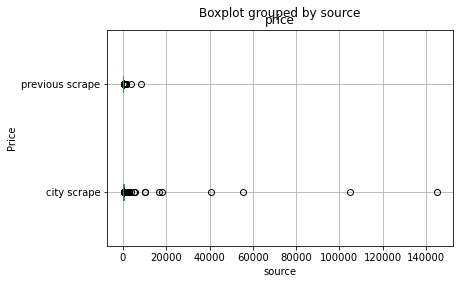

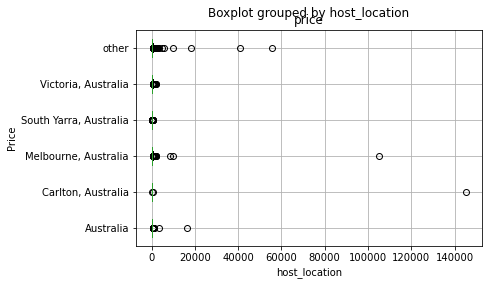

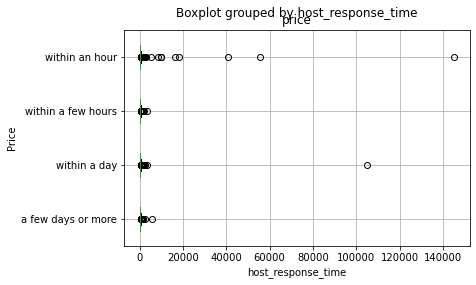

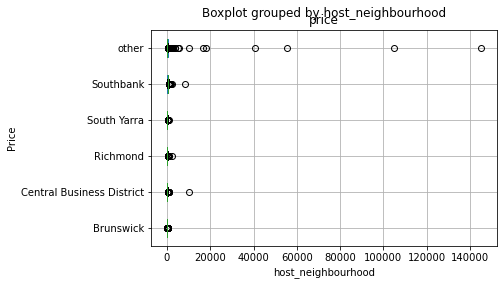

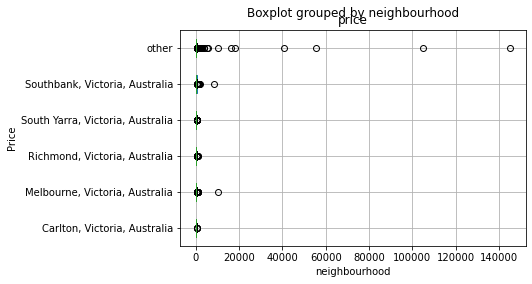

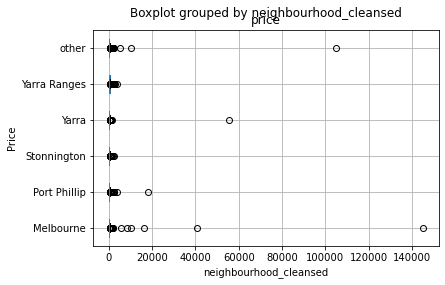

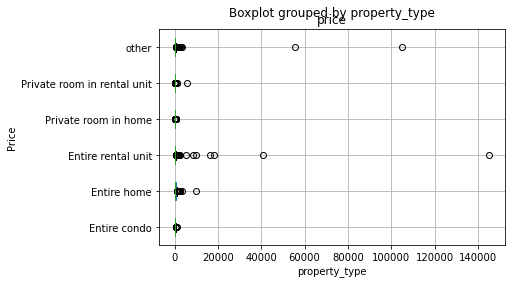

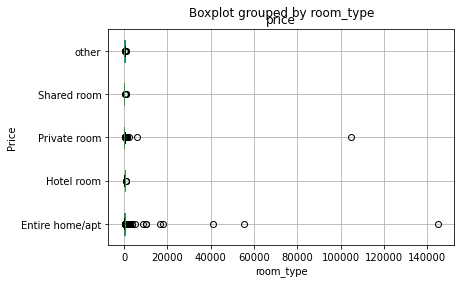

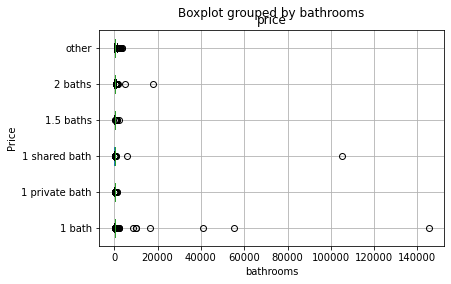

In [17]:
# Bivariate Analysis of Categorical Features vs. Target Variable (Price)
# Box plot to visualize the distribution of 'price' for each category features
for col in categorical_cols_all:
    df_train_imputed.boxplot(column='price', by=col, vert=False)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.show()

### Box Plots for Categorical Features:

The code creates box plots to visualize the distribution of 'price' for each category within categorical features.
Box plots help understand how categorical features impact the distribution of the target variable. They show the spread of prices within different categories.They help identify whether specific categories tend to have higher or lower prices compared to others. There are some specific example : 

1. Property Type vs. Price:
   - In the 'property_type' category, the 'entire rental unit' type consistently exhibits the highest median price compared to other property types.
   - This suggests that 'entire rental units' tend to be priced higher on average, making them the preferred choice for those seeking higher-priced accommodations.

2. Host Response Time vs. Price:
   - Among host response times, units with the 'fastest response' (typically responding within an hour) show the highest median price.
   - This implies that properties with quick host responses are associated with higher pricing, likely due to the perceived convenience and responsiveness of the host.

3. Room Type vs. Price:
   - Within 'room_type' categories, 'entire home/apartment' consistently displays the highest median price compared to other room types.
   - This suggests that 'entire home/apartment' accommodations tend to be more expensive, likely because they offer guests more privacy and space compared to shared rooms or private rooms within a home.


--- 
## Part 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

In [18]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ID                                            7000 non-null   int64         
 1   source                                        7000 non-null   object        
 2   name                                          6999 non-null   object        
 3   description                                   6943 non-null   object        
 4   neighborhood_overview                         5177 non-null   object        
 5   host_name                                     7000 non-null   object        
 6   host_since                                    7000 non-null   datetime64[ns]
 7   host_location                                 7000 non-null   object        
 8   host_about                                    4730 non-null   object

### Data Preparation

In [19]:
#Step One: Look at data
df_train_imputed[numerical_cols_all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            7000 non-null   float64
 1   host_acceptance_rate                          7000 non-null   float64
 2   host_is_superhost                             7000 non-null   float64
 3   host_listings_count                           7000 non-null   float64
 4   host_has_profile_pic                          7000 non-null   int64  
 5   host_identity_verified                        7000 non-null   int64  
 6   latitude                                      7000 non-null   float64
 7   longitude                                     7000 non-null   float64
 8   accommodates                                  7000 non-null   int64  
 9   bedrooms                                      7000 non-null   f

In [20]:
#Step Two: Load in programs
!pip install xgboost
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb 
import pandas as pd 
import matplotlib.pyplot as plt

In [21]:
#Step Three: Load in X and y
X = df_train_imputed[numerical_cols_all].drop(['price'], axis=1)
y = df_train_imputed['price']

In [22]:
#Step Four: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

In [23]:
#Step Four: Set up y_test for predictions by removing price from index list
numerical_cols_all.remove('price')

### Model One: Decision Tree Regression

In [24]:
#Step One: Default, Un-tuned hyperparmaters and predictions
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred_raw = tree.predict(X_test)
print('RMSE(No Paramater HyperTuning):', np.sqrt(metrics.mean_squared_error(y_test,pred_raw)))

RMSE(No Paramater HyperTuning): 1603.0515043860212


In [25]:
#Step Two: Grid Search to find best paramaters - Tuning Hyperparamaters
param_grid = [{"max_depth":[1,2,3,4,5,10,15,20,25], 
               "max_features":[1,2,3,4,5,10,15,20,25]}]

gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),
                  param_grid = param_grid,cv=10)

# try out every combination of the above values
gs.fit(X_train, y_train)

print("The best hyperparameters are ",gs.best_params_)

The best hyperparameters are  {'max_depth': 2, 'max_features': 10}


In [26]:
#Step Three: Fit tree with best parameters + research
treev1 = DecisionTreeRegressor(max_depth=2,max_features=1)
treev1.fit(X_train, y_train)
predv1 = treev1.predict(X_test)
print('RMSE(Paramater HyperTuning):', np.sqrt(metrics.mean_squared_error(y_test,predv1)))

RMSE(Paramater HyperTuning): 428.4388552909472


In [28]:
#Step Four: Predictions
test = df_test_imputed[numerical_cols_all]
predictions_dtr = treev1.predict(test)
output = pd.DataFrame({"Id":df_test_imputed['ID'], "Price":predictions_dtr})
output.to_csv('submission_dtr_v10.csv', index=False)

### Model Two:XGBoost Regressor

In [29]:
#Additional Data Prep: Making a matrix that xbg accepts for cross validation
data_dmatrix = xgb.DMatrix(data=X,label=y) 

In [30]:
#Step One:Default, Un-tuned hyperparmaters and prediction
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predRRD = regressor.predict(X_test)
print('RMSE(No Paramater HyperTuning):', np.sqrt(metrics.mean_squared_error(y_test,predRRD)))

RMSE(No Paramater HyperTuning): 2870.569853119034


In [31]:
#Step Two: Grid search to find best parameters - Tuning Hyperparamaters
regressor=xgb.XGBRegressor(eval_metric='rmse')
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth":    [1,5,10,15],
              "n_estimators": [1,5,10,15],
              "learning_rate": [0.01, 0.015,0.1]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 1, 'n_estimators': 1}


In [32]:
# Step Three: Fitting the regression model and predicting 
#VERSION 1: with only optimized paramaters of LR, NE AND MD
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(X_train, y_train)
predv1 = regressor.predict(X_test)

# Step Six: RMSE
RMSE = np.sqrt( mean_squared_error(y_test, predv1) )
print("The score is %.5f" % RMSE )

The score is 420.81796


In [33]:
# Step Three:Fitting the regression model and predicting  
#VERSION 2: with researched values to improve accuracy
xg_reg1 = xgb.XGBRegressor(colsample_bytree = 0.3, 
                          learning_rate = 0.015,max_depth = 1, n_estimators = 1,
                         eval_metric='rmse') 
#Version 1: 0.01,4,10,5
xg_reg1.fit(X_train,y_train) 
predv2 = xg_reg1.predict(X_test) 

# Step Six: RMSE
rmse = np.sqrt(mean_squared_error(y_test, predv2))  
print("RMSE: %f" % (rmse)) 

RMSE: 420.845590


In [34]:
#Step Three: Fitting the regression model and predicting 
#VERSION 3: with additional parameters and optimized values
xg_reg_v2 = xgb.XGBRegressor(colsample_bytree = 0.3, alpha = 10,
                          learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')
xg_reg_v2.fit(X_train,y_train) 
predv3 = xg_reg_v2.predict(X_test) 

# Step Six: RMSE
rmse = np.sqrt(mean_squared_error(y_test, predv3))  
print("RMSE: %f" % (rmse)) 

RMSE: 420.845584


In [35]:
# Step Six: Cross Validation 
params = {'colsample_bytree': 0.3,
          'learning_rate': 0.01,'max_depth': 4, 'alpha': 10,} 
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123) 
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2307.628718,254.912191,1507.827088,1770.511939
1,2302.002581,255.293786,1508.055470,1770.332472
2,2299.526530,254.545736,1508.241916,1770.229914
3,2295.656948,254.742018,1508.035183,1770.387300
4,2291.826260,255.212732,1507.901985,1770.453340


In [36]:
#Step Seven:Create Predictions from df_test_imputed
# VERSION 1 : With only optimized paramaters of LR, NE AND MD
test = df_test_imputed[numerical_cols_all]
predv1 = regressor.predict(test)
output = pd.DataFrame({"Id":df_test_imputed['ID'], "Price":predv1})
output.to_csv('submission_xbgv4.csv', index=False)

In [37]:
#Step Seven:Create Predictions from df_test_imputed
# VERSION 2:with researched values to improve accuracy
test = df_test_imputed[numerical_cols_all]
predv2 = xg_reg1.predict(test)
output = pd.DataFrame({"Id":df_test_imputed['ID'], "Price":predv2})
output.to_csv('submission_xgbv3.csv', index=False)

In [38]:
#Step Seven:Create Predictions from df_test_imputed
#VERSION 3: with additional parameters and optimized values
test = df_test_imputed[numerical_cols_all]
predv3 = xg_reg_v2.predict(test)
output = pd.DataFrame({"Id":df_test_imputed['ID'], "Price":predv3})
output.to_csv('submission_v3.csv', index=False)

### Comment:
Despite being a boosted version of Decision Tree Regression, xgBoost resulted in higher RMSE(worse) because the model is prone to over-fitting. This occurs when the model very well at predicting the known data but struggle to adapt to unknown data. Therefore for this model I had found Decision Tree Regression to be better and able to adapt to unknown data better.